## Copiar aqui o regressão linear e implementar o batch gradient descent

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

iris = load_iris()

data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x = data[:,0:1]
y = data[:,1:2]

x -= x.min()
x /= x.max()    # normalização
y -= y.min()
y /= y.max()

def compute_cost(X_b, y, wT):
    '''
    Compute cost for linear regression
    (X,y): amostras rotuladas X(n_samples,2) e y(n_samples,)
    wT: vetor coluna de parâmetros (já transposto)
       aceita tanto shape (2,1) Para um caso como (2,n_history) para n_history casos
    '''
    e = X_b.dot(wT) - y
    J = (e * e).mean(axis=0)
    return J

def batch_gradient_descent(X, y, w_init, lr, n_epochs):
    '''
    Perform batch gradient descent to learn w
    by taking n_epochs gradient steps with learning
    rate lr
    Dados rotulados: X.shape:(M,2) e y.shape:(M,1)
    Parâmetro inicial: w_init.shape:(1,2)
    output: w_history:(num_epochs+1,2)
    '''
    M = y.size
    w_history = np.zeros((2,n_epochs+1))
    wT = w_init.T
    w_history[:,0] = wT[:,0]

    for i in range(n_epochs):
        wT = wT - lr * (2.0 / M) * (X.T).dot(X.dot(wT) - y)
        w_history[:,i+1]=wT[:,0]
    return w_history.T

def stochastic_gradient_descent(X, y, w_init, lr, n_epochs):
    '''
    Perform stochastic gradient descent to learn w
    by taking n_epochs times number of samples 
    gradient steps with learning rate lr
    Dados rotulados: X.shape:(M,2) e y.shape:(M,1)
    Parâmetro inicial: w_init.shape:(1,2)
    output: w_history:(num_epochs+1,2)
    '''
    M = y.size
    w_history = np.zeros((2,(M*n_epochs)+1))
    wT = w_init.T
    w_history[:,0] = wT[:,0]

    for i in range(n_epochs):
        for jj in range(M):
            j = np.random.randint(M)
            wT = wT - lr * 2.0 * (X[j:j+1,:].T).dot(X[j:j+1,:].dot(wT) - y[j:j+1])
            w_history[:,jj+(i*M)+1] = wT[:,0]
    return w_history.T

def minibatch_gradient_descent(X, y, w_init, lr, n_epochs, batch_size):
    from math import ceil
    '''
    Perform stochastic gradient descent to learn w
    by taking n_epochs times number of samples 
    gradient steps with learning rate lr
    Dados rotulados: X.shape:(M,2) e y.shape:(M,1)
    Parâmetro inicial: w_init.shape:(1,2)
    output: w_history:(num_epochs+1,2)
    '''
    M = y.size
    n_batches = ceil(M/batch_size);
    w_history = np.zeros((2,(n_batches*n_epochs)+1))
    wT = w_init.T
    w_history[:,0] = wT[:,0]

    position = 0
    for i in range(n_epochs):
        d = np.hstack([X, y])
        np.random.shuffle(d)
        X, y = d[:,0:2], d[:,2:]
        jj = 0
        while jj < M:
            position += 1
            wT = wT - lr * (2.0 / batch_size) * (X[jj:jj+batch_size,:].T).dot(X[jj:jj+batch_size,:].dot(wT) - y[jj:jj+batch_size])
            w_history[:, position] = wT[:,0]
            jj += batch_size
    return w_history.T

# Parâmetros do gradiente descendente: número de iterações e taxa de aprendizagem
iterations = 100
lr = 0.1

n_samples = y.shape[0]

#Montagem da matriz X agora com os elementos 1 na primeira coluna
X_bias = np.hstack([np.ones(shape=(n_samples,1)), x])
w_init = np.zeros(shape=(1,2))

w_opt = (np.linalg.inv((X_bias.T).dot(X_bias)).dot(X_bias.T)).dot(y)

w_history1 = minibatch_gradient_descent(X_bias, y, w_init, lr, iterations,1)
w_history2 = minibatch_gradient_descent(X_bias, y, w_init, lr, iterations, 15)
w_history3 = minibatch_gradient_descent(X_bias, y, w_init, lr, iterations, n_samples)

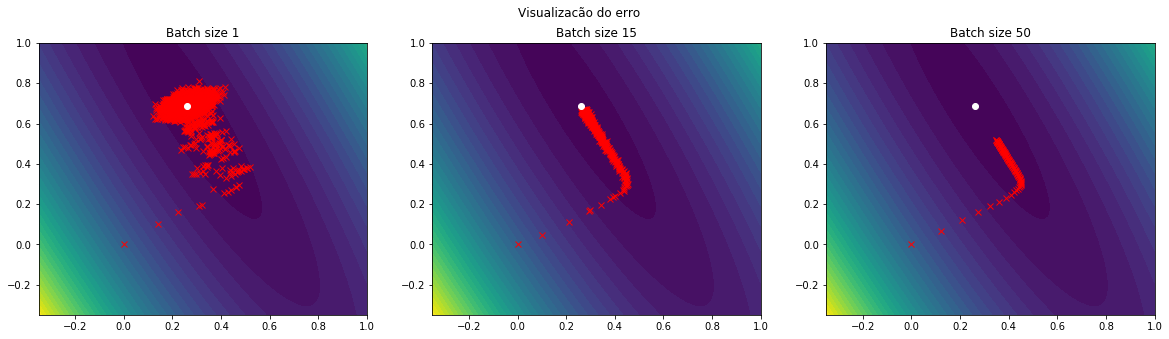

In [12]:
#criando a matriz do espaço de parâmetros
linspace = np.linspace(-0.35, 1, 100)
ww0, ww1 = np.meshgrid(linspace, linspace)
w_grid = np.c_[ww0.ravel(), ww1.ravel()].T

#calculando a função custo nesses pontos
J = (np.square(np.dot(X_bias, w_grid) - y)).mean(axis=0)
J = J.reshape(100,100)

#plotando as curvs de nível, junto com o histórico dos parâmetros e o ponto ótimo
fig = plt.figure(figsize=(20,5))
plt.suptitle('Visualizacão do erro')

ax = fig.add_subplot(131)
plt.title("Batch size 1")
plt.contourf(ww0, ww1, J, 40)
plt.plot(w_history1[:,0], w_history1[:,1], 'rx')
plt.plot(w_opt[0], w_opt[1], 'wo', markersize='6')

ax = fig.add_subplot(132)
plt.title("Batch size 15")
plt.contourf(ww0, ww1, J, 40)
plt.plot(w_history2[:,0], w_history2[:,1], 'rx')
plt.plot(w_opt[0], w_opt[1], 'wo', markersize='6')

ax = fig.add_subplot(133)
plt.title("Batch size 50")
plt.contourf(ww0, ww1, J, 40)
plt.plot(w_history3[:,0], w_history3[:,1], 'rx')
plt.plot(w_opt[0], w_opt[1], 'wo', markersize='6')


#TEM QUE PLOTAR ERROOOO!!!
plt.savefig('my_sgd_minibatch.png')
plt.show()